## Introduction to Pandas

Python for Data Analysis, 2nd Edition
Data Wrangling with Pandas, NumPy, and IPython
By William McKinney
Publisher: O'Reilly Media
Release Date: October 2017
Pages: 522
http://proquest.safaribooksonline.com/book/programming/python/9781491957653/

https://pandas.pydata.org/pandas-docs/stable/dsintro.html


<h3>Series</h3>

A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index. The simplest Series is formed from only an array of data:

In [4]:
import pandas as pd
import numpy as np

In [5]:
obj = pd.Series([4, 7, -5, 3]) # no index specified, default
print (obj)

0    4
1    7
2   -5
3    3
dtype: int64


In [6]:
print (obj.values)
print (obj.index)

[ 4  7 -5  3]
RangeIndex(start=0, stop=4, step=1)


In [7]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print (obj2)

d    4
b    7
a   -5
c    3
dtype: int64


In [8]:
print (obj2.values)
print (obj2.index)

[ 4  7 -5  3]
Index(['d', 'b', 'a', 'c'], dtype='object')


In [9]:
print (obj2[obj2 > 0])

d    4
b    7
c    3
dtype: int64


In [10]:
print (obj2[0:2])
print (obj2[::2])

d    4
b    7
dtype: int64
d    4
a   -5
dtype: int64


In [11]:
print (obj2 + obj2[::2]) # note that obj2[::2] has missing values for b and c

a   -10.0
b     NaN
c     NaN
d     8.0
dtype: float64


In [12]:
#Create a series from data contained in a Python dict.
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Exercise 1: Given two lists one containings keys and the other values, first create a dictionary and then create a Panda series using the created dictionary. Next show how to create an identical panda series directly from the two lists without converting to dictionary. Test your code on:

List1: ['Ohio', 'Texas', 'Oregon', 'Utah']

List2: [35000, 71000, 16000, 5000]

Hint: Use zip for the first part, and for the second part see example in Cell 4

In [13]:
List1= ['Ohio', 'Texas', 'Oregon', 'Utah']

List2= [35000, 71000, 16000, 5000]
data=zip(List1,List2)
diction=dict(data)
print(diction)

obj2 = pd.Series(['Ohio', 'Texas', 'Oregon', 'Utah'], index=[35000, 71000, 16000, 5000])
print (obj2)

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
35000      Ohio
71000     Texas
16000    Oregon
5000       Utah
dtype: object


### Time Series 

It is a series indexed by timestamp. Time series data is an important form of structured data in many different fields, such as finance, economics, ecology, neuroscience, and physics. 



In [14]:
from datetime import datetime
import numpy as np

In [14]:
datetime?

In [15]:
# create a time series of size 6 of random data
values = np.random.randn(6)
values

array([ 0.65902291,  0.64320336, -0.33331161,  1.15091282, -0.31415951,
        0.22626941])

In [16]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
            datetime(2011, 1, 7), datetime(2011, 1, 8),
            datetime(2011, 1, 10), datetime(2011, 1, 12)]
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [17]:
ts = pd.Series(values, index=dates)
ts

2011-01-02    0.659023
2011-01-05    0.643203
2011-01-07   -0.333312
2011-01-08    1.150913
2011-01-10   -0.314160
2011-01-12    0.226269
dtype: float64

In [18]:
# Use of pandas date_range for generating time index
pd.date_range?

In [19]:
dates = pd.date_range('1/1/2000', periods=10) # default frequency daily
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
values = np.random.randn(10)
values

array([-1.5467625 , -1.01485731,  1.55699653, -0.46670655,  0.78338475,
        1.05616179,  0.64631292, -0.8085553 ,  0.2720545 , -0.32508086])

In [21]:
ts = pd.Series(values,index=dates) 
print (ts)

2000-01-01   -1.546763
2000-01-02   -1.014857
2000-01-03    1.556997
2000-01-04   -0.466707
2000-01-05    0.783385
2000-01-06    1.056162
2000-01-07    0.646313
2000-01-08   -0.808555
2000-01-09    0.272054
2000-01-10   -0.325081
Freq: D, dtype: float64


In [22]:
ts = pd.Series(np.random.randn(10),index=pd.date_range('1/1/2000', periods=10, freq='4H')) 
print (ts)

2000-01-01 00:00:00    1.673877
2000-01-01 04:00:00    0.293622
2000-01-01 08:00:00   -0.590537
2000-01-01 12:00:00   -0.591132
2000-01-01 16:00:00    1.375739
2000-01-01 20:00:00   -0.974210
2000-01-02 00:00:00   -0.258809
2000-01-02 04:00:00   -0.691913
2000-01-02 08:00:00   -2.201911
2000-01-02 12:00:00    1.941715
Freq: 4H, dtype: float64


In [23]:
print (ts.truncate(after='2000-01-01 12:00:00'))

2000-01-01 00:00:00    1.673877
2000-01-01 04:00:00    0.293622
2000-01-01 08:00:00   -0.590537
2000-01-01 12:00:00   -0.591132
Freq: 4H, dtype: float64


In [24]:
# index time series
ts = pd.Series(np.random.randn(50),index=pd.date_range('1/1/2000', periods=50, freq='M')) 
print (ts['2001'])

2001-01-31    0.747247
2001-02-28    0.164980
2001-03-31    0.278638
2001-04-30    1.365572
2001-05-31   -0.695129
2001-06-30    0.196298
2001-07-31   -0.217218
2001-08-31    1.063180
2001-09-30   -1.661802
2001-10-31    0.476491
2001-11-30    0.141803
2001-12-31    0.228536
Freq: M, dtype: float64


Exercise 2: Create a times series that has some random values for the following dates (similar to first example):
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
            datetime(2012, 1, 7), datetime(2012, 1, 8),
            datetime(2012, 1, 10), datetime(2012, 2, 12)]
Selectively print the series for the year 2011. Next selectively print the series for January 2012.

In [25]:
values = np.random.randn(6)
values

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
            datetime(2012, 1, 7), datetime(2012, 1, 8),
            datetime(2012, 1, 10), datetime(2012, 1, 12)]
dates
ts = pd.Series(values, index=dates)
ts
print(ts['2011'])
print(ts['2012'])

2011-01-02    0.635481
2011-01-05    0.711496
dtype: float64
2012-01-07   -2.026049
2012-01-08   -0.388416
2012-01-10   -0.942777
2012-01-12    1.565149
dtype: float64


###  Data Frame 
A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index. 

One way to create a DataFrame is from a dict of equal-length lists or NumPy arrays:


In [26]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [44]:
#access a row
frame.loc?

In [27]:
frame.loc[3]

state    Nevada
year       2001
pop         2.4
Name: 3, dtype: object

In [28]:
# access a column
frame['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [ ]:
# access a column
frame.state

In [29]:
data = {'us state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,us state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [53]:
frame['us state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: us state, dtype: object

In [54]:
frame['us state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: us state, dtype: object

In [55]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [56]:
s=frame['state']
print(s[3])

Nevada


In [57]:
# access selective columns
frame[['pop', 'year']]

,pop,year
0,1.5,2000
1,1.7,2001
2,3.6,2002
3,2.4,2001
4,2.9,2002
5,3.2,2003


In [31]:
frame2 = pd.DataFrame(frame)

In [32]:
# replace row 4
frame2.iloc[4] = dict(pop=1.2,state='Virginia',year=1999)
frame2


,us state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,pop,state,year
5,Nevada,2003,3.2


In [33]:
#need to create a series before assignment
frame.iloc[4] =pd.Series(dict(pop=1.2,state='Virginia',year=1999))
frame

,us state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,NaN,1999,1.2
5,Nevada,2003,3.2


In [34]:
# slicing
frame[4:6]

,us state,year,pop
4,NaN,1999,1.2
5,Nevada,2003,3.2


In [35]:
print(frame[::-1]) #implicitly frame[5::-1]
print(frame[5::-1])

  us state  year  pop
5   Nevada  2003  3.2
4      NaN  1999  1.2
3   Nevada  2001  2.4
2     Ohio  2002  3.6
1     Ohio  2001  1.7
0     Ohio  2000  1.5
  us state  year  pop
5   Nevada  2003  3.2
4      NaN  1999  1.2
3   Nevada  2001  2.4
2     Ohio  2002  3.6
1     Ohio  2001  1.7
0     Ohio  2000  1.5


In [ ]:
 frame.iloc[[1, 4], [0, 2]]  # select a subset identified by the intersection of row# and col#

In [36]:
frame.iloc[[1, 4], : ]

,us state,year,pop
1,Ohio,2001,1.7
4,NaN,1999,1.2


In [37]:
# create dataframe using series
ts1 = pd.Series([1., 2., 3.], index=['a', 'b', 'c'])
ts1

a    1.0
b    2.0
c    3.0
dtype: float64

In [38]:
ts2 = pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
ts2

a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64

In [39]:
d = {'one' : ts1, 'two' : ts2}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


What would happen if you would have used the following series for column 'one' while creating the dataframe d:

'one' : pd.Series([0., 1., 2., 3.], index=['d','a', 'b', 'c'])


In [40]:
d = {'one' : pd.Series([0., 1., 2., 3.], index=['d', 'a', 'b', 'c']), 
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,0.0,4.0


In [ ]:
# delete a column
del df['two']
df

In [41]:
df1 = pd.DataFrame(d)
df2 = df1
print (df2)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  0.0  4.0


In [42]:
del df2['two']
df1

,one
a,1.0
b,2.0
c,3.0
d,0.0


In [43]:
# for making copy
df1 = pd.DataFrame(d)
df2 = df1.copy()
df2

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,0.0,4.0


In [44]:
del df2['two']
df1

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,0.0,4.0


#### Assigning New Columns 

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
iris_df = sns.load_dataset("iris")
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [48]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
# assign a calculated column and returns a copy. the original data frame is not modified
dfn = iris_df.assign(sepal_ratio = lambda x: (x['sepal_width'] / x['sepal_length']))
dfn.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [ ]:
iris_df.head()

We can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

In [50]:
iris_df.query('sepal_length > 5').head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


In [51]:
iris_dfn = iris_df.query('sepal_length > 5').assign(sepal_ratio = lambda x: x['sepal_width'] / x['sepal_length'],
                            petal_ratio = lambda x: x['petal_width'] / x['petal_length'])
iris_dfn.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio,petal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275,0.142857
5,5.4,3.9,1.7,0.4,setosa,0.722222,0.235294
10,5.4,3.7,1.5,0.2,setosa,0.685185,0.133333
14,5.8,4.0,1.2,0.2,setosa,0.689655,0.166667
15,5.7,4.4,1.5,0.4,setosa,0.771930,0.266667


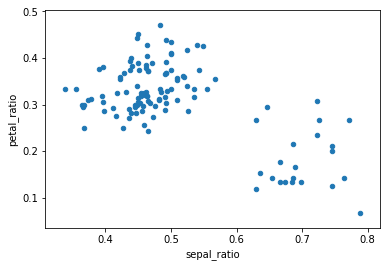

In [52]:
iris_dfn.plot(kind='scatter', x='sepal_ratio', y='petal_ratio')
plt.show()

Summarizing and Computing Descriptive Statistics
pandas objects are equipped with a set of common mathematical and statistical methods. Most of these fall into the category of reductions or summary statistics, methods that extract a single value (like the sum or mean) from a Series or a Series of values from the rows or columns of a DataFrame.

In [53]:
data = {'C1': np.random.randn(10),
        'C2': 1.0+np.random.randn(10)}
frame = pd.DataFrame(data)
frame

,C1,C2
0,-0.645243,0.197346
1,-0.285352,1.896976
2,2.402218,0.453446
3,1.318142,-0.262893
4,1.385016,-0.122361
5,1.541915,0.007639
6,-1.348807,1.655632
7,-0.329971,0.025757
8,0.027975,1.385206
9,-1.021458,0.968977


idxmin and idxmax, return indirect statistics like the index value where the minimum or maximum values are attained:

In [54]:
frame.idxmax()

C1    2
C2    1
dtype: int64

In [55]:
frame.cumsum()

,C1,C2
0,-0.645243,0.197346
1,-0.930595,2.094322
2,1.471623,2.547767
3,2.789765,2.284874
4,4.174781,2.162513
5,5.716696,2.170152
6,4.367889,3.825784
7,4.037918,3.851541
8,4.065893,5.236747
9,3.044435,6.205724


In [56]:
frame

,C1,C2
0,-0.645243,0.197346
1,-0.285352,1.896976
2,2.402218,0.453446
3,1.318142,-0.262893
4,1.385016,-0.122361
5,1.541915,0.007639
6,-1.348807,1.655632
7,-0.329971,0.025757
8,0.027975,1.385206
9,-1.021458,0.968977


In [57]:
frame.describe()

,C1,C2
count,10.000000,10.000000
mean,0.304443,0.620572
std,1.262588,0.794118
min,-1.348807,-0.262893
25%,-0.566425,0.012169
50%,-0.128688,0.325396
75%,1.368297,1.281149
max,2.402218,1.896976


In [58]:
t = frame.iterrows()
ind, row = next(t)
print (ind)
print (row)

0
C1   -0.645243
C2    0.197346
Name: 0, dtype: float64


In [59]:
ind, row = next(t)
print (ind)
print (row)

1
C1   -0.285352
C2    1.896976
Name: 1, dtype: float64


Iterate over rows using construct like this: 'for index, row in frame.iterrows()'

Exercise 3: User iterrow() to print out values on column C1 for dataframe frame. 


In [72]:
i=frame.iterrows()
for ind , row in i:
    print(row[0])
    

-0.6452429702837451
-0.2853517132030281
2.4022181831700156
1.3181419032929966
1.3850155490937863
1.541914816029735
-1.348807011698795
-0.32997050533331973
0.02797473834951542
-1.0214580821996133


#### applymap
This method applies a function that accepts and returns a scalar to every element of a DataFrame.

In [ ]:
df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])
df

In [ ]:
df.applymap(lambda x: x+0.5)

Exercise 4: Write a lambda function for applymap to multiply every element of the iris_df by '10' except the elements in column species which are string.

Hint: Check for an element type and if it is float only do the required operation.
lambda x: x*10 if type(x) is float else x

In [63]:
iris_df
iris_df1=iris_df.applymap(lambda x: x*10 if type(x) is float else x)
iris_df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,51.0,35.0,14.0,2.0,setosa
1,49.0,30.0,14.0,2.0,setosa
2,47.0,32.0,13.0,2.0,setosa
3,46.0,31.0,15.0,2.0,setosa
4,50.0,36.0,14.0,2.0,setosa
5,54.0,39.0,17.0,4.0,setosa
6,46.0,34.0,14.0,3.0,setosa
7,50.0,34.0,15.0,2.0,setosa
8,44.0,29.0,14.0,2.0,setosa
9,49.0,31.0,15.0,1.0,setosa


<h3>Correlation and Covariance using Pandas</h3>
Let’s consider some DataFrames of stock prices and volumes obtained from Yahoo! Finance using the add-on pandas-datareader package. If you don’t have it installed already, please install using conda:

conda install pandas-datareader

http://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [17]:
import pandas_datareader.data as web

In [18]:
start = datetime(2019, 1, 1)
end = datetime(2019, 2, 14)
aapl = web.DataReader('AAPL', 'yahoo', start, end)

In [77]:
aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,157.245605
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,141.582779
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,147.626846
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,147.298264
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,150.106216
2019-01-09,154.529999,149.630005,151.289993,153.309998,45099100.0,152.655289
2019-01-10,153.970001,150.860001,152.500000,153.800003,35780700.0,153.143204
2019-01-11,153.699997,151.509995,152.880005,152.289993,27023200.0,151.639633
2019-01-14,151.270004,149.220001,150.850006,150.000000,32439200.0,149.359421


In [78]:
all_data = {ticker: web.DataReader(ticker,'yahoo',start, end)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

In [79]:
all_data

{'AAPL':                   High         Low        Open       Close      Volume  \
 Date                                                                     
 2019-01-02  158.850006  154.229996  154.889999  157.919998  37039700.0   
 2019-01-03  145.720001  142.000000  143.979996  142.190002  91312200.0   
 2019-01-04  148.550003  143.800003  144.529999  148.259995  58607100.0   
 2019-01-07  148.830002  145.899994  148.699997  147.929993  54777800.0   
 2019-01-08  151.820007  148.520004  149.559998  150.750000  41025300.0   
 2019-01-09  154.529999  149.630005  151.289993  153.309998  45099100.0   
 2019-01-10  153.970001  150.860001  152.500000  153.800003  35780700.0   
 2019-01-11  153.699997  151.509995  152.880005  152.289993  27023200.0   
 2019-01-14  151.270004  149.220001  150.850006  150.000000  32439200.0   
 2019-01-15  153.389999  150.050003  150.270004  153.070007  28710900.0   
 2019-01-16  155.880005  153.000000  153.080002  154.940002  30569700.0   
 2019-01-17  157.

In [ ]:
type(all_data)

In [80]:
all_data.keys()

dict_keys(['AAPL', 'IBM', 'MSFT', 'GOOG'])

In [81]:
dprice = {ticker: data['Adj Close'] for ticker, data in all_data.items()}

In [82]:
price = pd.DataFrame(dprice)

In [83]:
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

In [84]:
price

,AAPL,IBM,MSFT,GOOG
Date,,,,
2019-01-02,157.245605,113.883118,101.120003,1045.849976
2019-01-03,141.582779,111.609612,97.400002,1016.059998
2019-01-04,147.626846,115.968819,101.930000,1070.709961
2019-01-07,147.298264,116.789261,102.059998,1068.390015
2019-01-08,150.106216,118.449913,102.800003,1076.280029
2019-01-09,152.655289,119.300011,104.269997,1074.660034
2019-01-10,153.143204,120.387337,103.599998,1070.329956
2019-01-11,151.639633,120.061142,102.800003,1057.189941
2019-01-14,149.359421,119.003464,102.050003,1044.689941


###  One Period Simple Gross Return for a stock

<i>Defnition: </i>Let $S_{i-1}$ and $S_i$  be the price of a stock at time $t_{i-1}$ and $t_i$ respectively. Then a return $r_i$ for an asset at time $t_i$ for one unit of time is given by:
\begin{equation*}
r_i = \frac{S_i - S_{i-1}}{S_{i-1}}
\end{equation*}
A simple gross return for one period is given by:

$$ (1 + r_i) = \frac{S_i}{S_{i-1}}$$
Example: 
\begin{eqnarray*}
S_{i-1} & = & 10 \\
S_{i} & = & 15 \\
r_i & = & \frac{15-10}{10} = 0.50
\end{eqnarray*}
Asset has a  return of $50\%$ at time $t_i$ for one unit of time, and a simple gross return of $1.50$

###  Multiperiod Simple Gross Return for a stock
If we hold the stock  for k periods, say from time $t_1$ to $t_{k+1}$ then the $k$-period simple <b>gross</b> return at $t_{k+1}$  is given by:

\begin{eqnarray*}
1+r_{k+1}^k & = &  \frac{S_{k+1}}{S_{1}}    \\
  & =  &   \frac{S_{k+1}}{S_{k}} \times \frac{S_{k}}{S_{k-1}} \times \ldots \frac{S_{2}}{S_{1}} \\
  & =  &  (1+r_{k+1}) (1+r_{k}) \ldots (1+r_2)  \\
  & =  &  \prod_{j=1}^{k} (1+r_{j+1})
\end{eqnarray*}

In other words, the $k$-period simple gross return is just the product of $k$ one-period gross returns involved.


In [85]:
returns = price.pct_change()
returns

,AAPL,IBM,MSFT,GOOG
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.019964,-0.036788,-0.028484
2019-01-04,0.042689,0.039058,0.046509,0.053786
2019-01-07,-0.002226,0.007075,0.001275,-0.002167
2019-01-08,0.019063,0.014219,0.007251,0.007385
2019-01-09,0.016982,0.007177,0.014300,-0.001505
2019-01-10,0.003196,0.009114,-0.006426,-0.004029
2019-01-11,-0.009818,-0.002710,-0.007722,-0.012277
2019-01-14,-0.015037,-0.008809,-0.007296,-0.011824


In [86]:
rgross = returns + 1.0 
print (rgross)

                AAPL       IBM      MSFT      GOOG
Date                                              
2019-01-02       NaN       NaN       NaN       NaN
2019-01-03  0.900393  0.980036  0.963212  0.971516
2019-01-04  1.042689  1.039058  1.046509  1.053786
2019-01-07  0.997774  1.007075  1.001275  0.997833
2019-01-08  1.019063  1.014219  1.007251  1.007385
2019-01-09  1.016982  1.007177  1.014300  0.998495
2019-01-10  1.003196  1.009114  0.993574  0.995971
2019-01-11  0.990182  0.997290  0.992278  0.987723
2019-01-14  0.984963  0.991191  0.992704  0.988176
2019-01-15  1.020467  1.011131  1.029005  1.031071
2019-01-16  1.012217  0.999096  1.003523  1.003546
2019-01-17  1.005938  1.004687  1.007022  1.008261
2019-01-18  1.006159  1.013340  1.014983  1.007670
2019-01-22  0.977554  0.989501  0.981153  0.974742
2019-01-23  1.004044  1.084639  1.009746  1.004717
2019-01-24  0.992074  0.997291  0.995221  0.998447
2019-01-25  1.033137  1.010865  1.009134  1.015914
2019-01-28  0.990745  1.002239 

In [87]:
_ = rgross.fillna(1.0, inplace=True)  # assume the return on the first day was zero
print (rgross)

                AAPL       IBM      MSFT      GOOG
Date                                              
2019-01-02  1.000000  1.000000  1.000000  1.000000
2019-01-03  0.900393  0.980036  0.963212  0.971516
2019-01-04  1.042689  1.039058  1.046509  1.053786
2019-01-07  0.997774  1.007075  1.001275  0.997833
2019-01-08  1.019063  1.014219  1.007251  1.007385
2019-01-09  1.016982  1.007177  1.014300  0.998495
2019-01-10  1.003196  1.009114  0.993574  0.995971
2019-01-11  0.990182  0.997290  0.992278  0.987723
2019-01-14  0.984963  0.991191  0.992704  0.988176
2019-01-15  1.020467  1.011131  1.029005  1.031071
2019-01-16  1.012217  0.999096  1.003523  1.003546
2019-01-17  1.005938  1.004687  1.007022  1.008261
2019-01-18  1.006159  1.013340  1.014983  1.007670
2019-01-22  0.977554  0.989501  0.981153  0.974742
2019-01-23  1.004044  1.084639  1.009746  1.004717
2019-01-24  0.992074  0.997291  0.995221  0.998447
2019-01-25  1.033137  1.010865  1.009134  1.015914
2019-01-28  0.990745  1.002239 

<a id='gross_return_plot'></a>
#### Gross Return Plot

In [88]:
prs = rgross.cumprod()
prs

,AAPL,IBM,MSFT,GOOG
Date,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000
2019-01-03,0.900393,0.980036,0.963212,0.971516
2019-01-04,0.938830,1.018314,1.008010,1.023770
2019-01-07,0.936740,1.025519,1.009296,1.021552
2019-01-08,0.954597,1.040101,1.016614,1.029096
2019-01-09,0.970808,1.047565,1.031151,1.027547
2019-01-10,0.973911,1.057113,1.024525,1.023407
2019-01-11,0.964349,1.054249,1.016614,1.010843
2019-01-14,0.949848,1.044961,1.009197,0.998891


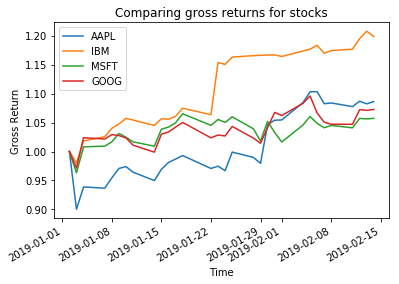

In [89]:
prs.plot()
plt.title('Comparing gross returns for stocks')
plt.xlabel('Time')
plt.ylabel('Gross Return')
plt.legend();
plt.show()

The cov (corr) method of Series can compute the covariance (coorelation) between the two series (non NaN and aligned-by-index).

In [ ]:
pd.Series.corr?

In [90]:
returns['MSFT'].corr(returns['IBM'])

0.48358115909430827

In [91]:
returns['MSFT'].cov(returns['IBM'])

0.0001593099538015928

DataFrame’s corr and cov methods, on the other hand, return a full correlation or covariance matrix as a DataFrame, respectively:

In [ ]:
pd.DataFrame.cov?

In [92]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000734,0.000189,0.000396,0.000370
IBM,0.000189,0.000333,0.000159,0.000146
MSFT,0.000396,0.000159,0.000326,0.000275
GOOG,0.000370,0.000146,0.000275,0.000338


In [93]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.382373,0.808412,0.743765
IBM,0.382373,1.000000,0.483581,0.436215
MSFT,0.808412,0.483581,1.000000,0.828047
GOOG,0.743765,0.436215,0.828047,1.000000


In [ ]:
pd.DataFrame.corrwith?

In [94]:
returns.corrwith(returns.IBM) # a particular row of the corr matrix

AAPL    0.382373
IBM     1.000000
MSFT    0.483581
GOOG    0.436215
dtype: float64

In [ ]:
#compute correlations of percent changes with volume
print (volume)
print (returns.corrwith(volume))

Exercise 5: Use the pandas_datareader to get the daily price for the year 2017 for stocks: STLD, NUE, and IBM. PLot the gross returns for the three stocks based on 'Adj Close' price of a stock as shown in the notebook. Comment on what you observe from the plots in terms of how similar or different are the plots for different stocks. Next compute the coorelation matrix and comment on what you observe. 

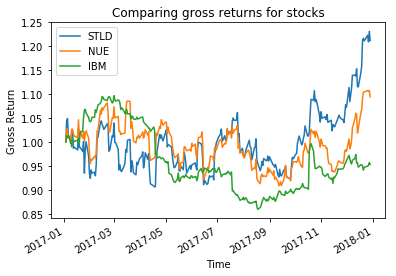

In [19]:
start = datetime(2017, 1, 1)
end = datetime(2017, 12, 31)
all_data = {ticker: web.DataReader(ticker,'yahoo',start, end)
            for ticker in ['STLD', 'NUE', 'IBM']}
dprice = {ticker: data['Adj Close'] for ticker, data in all_data.items()}
price=pd.DataFrame(dprice)
returns=price.pct_change()
rgross = returns + 1.0 
_ = rgross.fillna(1.0, inplace=True)  # assume the return on the first day was zero
prs = rgross.cumprod()
prs.plot()
plt.title('Comparing gross returns for stocks')
plt.xlabel('Time')
plt.ylabel('Gross Return')
plt.legend();
plt.show()


In [22]:
returns.corr()

,STLD,NUE,IBM
STLD,1.000000,0.847518,0.093178
NUE,0.847518,1.000000,0.138282
IBM,0.093178,0.138282,1.000000


In [ ]:
# Upon Identifying the corelation matrix we can conclude that  STLD and NUE are nearly corealted to each other seeing the values of 0.84 between the shares.Followed by NUE and IBM with a value of 0.138.

### Filtering Out Missing Data

In [105]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [ ]:
pd.DataFrame.dropna?

In [106]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

With DataFrame objects, things are a bit more complex. You may want to drop rows or columns that are all NA or only 
those containing any NAs. dropna by default drops any row containing a missing value:

In [107]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [108]:
cleaned = data.dropna()
print (cleaned)

     0    1    2
0  1.0  6.5  3.0


In [109]:
#Passing how='all' will only drop rows that are all NA:
cleaned = data.dropna(how='all')
print (cleaned)

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0


In [110]:
df = pd.DataFrame(np.random.randn(7, 3)) # a quick way to create a random dataframe
df

,0,1,2
0,0.214165,-1.200488,-1.261884
1,-0.283436,-0.093657,0.171650
2,0.269320,1.136369,-0.085102
3,-0.364964,-0.284758,-0.627368
4,0.240456,0.257644,1.161380
5,0.231193,-1.474257,0.428075
6,-1.117127,1.207128,0.358414


In [111]:
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
print (df)

          0         1         2
0  0.214165       NaN       NaN
1 -0.283436       NaN       NaN
2  0.269320       NaN -0.085102
3 -0.364964       NaN -0.627368
4  0.240456  0.257644  1.161380
5  0.231193 -1.474257  0.428075
6 -1.117127  1.207128  0.358414


In [112]:
print (df.dropna())
df.dropna(thresh=2)

          0         1         2
4  0.240456  0.257644  1.161380
5  0.231193 -1.474257  0.428075
6 -1.117127  1.207128  0.358414


,0,1,2
2,0.269320,NaN,-0.085102
3,-0.364964,NaN,-0.627368
4,0.240456,0.257644,1.161380
5,0.231193,-1.474257,0.428075
6,-1.117127,1.207128,0.358414


### Filling In Missing Data
Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways. Calling fillna with a constant replaces missing values with that value:

In [113]:
print(df)

          0         1         2
0  0.214165       NaN       NaN
1 -0.283436       NaN       NaN
2  0.269320       NaN -0.085102
3 -0.364964       NaN -0.627368
4  0.240456  0.257644  1.161380
5  0.231193 -1.474257  0.428075
6 -1.117127  1.207128  0.358414


In [114]:
print (df.fillna(0))

          0         1         2
0  0.214165  0.000000  0.000000
1 -0.283436  0.000000  0.000000
2  0.269320  0.000000 -0.085102
3 -0.364964  0.000000 -0.627368
4  0.240456  0.257644  1.161380
5  0.231193 -1.474257  0.428075
6 -1.117127  1.207128  0.358414


In [115]:
df.fillna({1: 0.5, 2: 0}) # column 1 NAs are replaced by 0.5 and column 2 NAs are replaced by 0

,0,1,2
0,0.214165,0.500000,0.000000
1,-0.283436,0.500000,0.000000
2,0.269320,0.500000,-0.085102
3,-0.364964,0.500000,-0.627368
4,0.240456,0.257644,1.161380
5,0.231193,-1.474257,0.428075
6,-1.117127,1.207128,0.358414


### Removing Duplicates
The DataFrame method duplicated returns a boolean Series indicating whether each row is a duplicate (has been observed in a previous row) or not:

In [116]:
# generate some data with duplicates
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [117]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
data.drop_duplicates()

In [118]:
data['v1'] = range(7)

In [119]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [120]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [121]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


Exercise 6: Create the following dataframe:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three']).  Next reindex this dataframe by:

df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

Use pd.DataFrame.reindex? to check what reindex does.

Check null entries in dataframe by using isnull() function. 

Use pd.DataFrame.isnull? for help.

Next fill the null values by zeros.

In [129]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])
df
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])# adding Nan values in the absent index.
df2
pd.DataFrame.isnull(df2)
df3=df2.fillna(0)
df3

,one,two,three
a,-0.056651,-0.071108,0.529136
b,0.000000,0.000000,0.000000
c,-1.305495,0.463116,0.564856
d,0.000000,0.000000,0.000000
e,-0.594970,1.230450,-0.954686
f,-0.370042,0.251874,1.329505
g,0.000000,0.000000,0.000000
h,-1.166075,0.926385,0.257301


## Hierarchical Indexing
Hierarchical indexing is an important feature of pandas that enables you to have multiple (two or more) index levels on an axis. 

In [130]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])

data #The “gaps” in the index display mean “use the label directly above”

a  1   -0.368859
   2   -1.274841
   3   -0.586258
b  1   -0.303304
   3   -0.921461
c  1   -2.221989
   2   -0.936072
d  2    0.446936
   3   -0.660854
dtype: float64

In [131]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

In [132]:
#With a hierarchically indexed object, so-called partial 
#indexing is possible, enabling you to concisely select subsets of the data:
print (data['b'])

1   -0.303304
3   -0.921461
dtype: float64


In [133]:
print (data['b':'c'])

b  1   -0.303304
   3   -0.921461
c  1   -2.221989
   2   -0.936072
dtype: float64


In [134]:
print (data.loc[['b', 'd']])

b  1   -0.303304
   3   -0.921461
d  2    0.446936
   3   -0.660854
dtype: float64


In [135]:
print (data)
data.loc[:, 2]

a  1   -0.368859
   2   -1.274841
   3   -0.586258
b  1   -0.303304
   3   -0.921461
c  1   -2.221989
   2   -0.936072
d  2    0.446936
   3   -0.660854
dtype: float64


a   -1.274841
c   -0.936072
d    0.446936
dtype: float64

In [136]:
data.unstack()

,1,2,3
a,-0.368859,-1.274841,-0.586258
b,-0.303304,NaN,-0.921461
c,-2.221989,-0.936072,NaN
d,NaN,0.446936,-0.660854


In [137]:
data.unstack().stack()

a  1   -0.368859
   2   -1.274841
   3   -0.586258
b  1   -0.303304
   3   -0.921461
c  1   -2.221989
   2   -0.936072
d  2    0.446936
   3   -0.660854
dtype: float64

Exercise 7: For the hierarchically indexed object as created in the example above:

data = pd.Series(np.random.randn(9), index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'], [1, 2, 3, 1, 3, 1, 2, 2, 3]])

Use unstack function to create a dataframe that looks like this when you print (Hint: Look at the documentation):


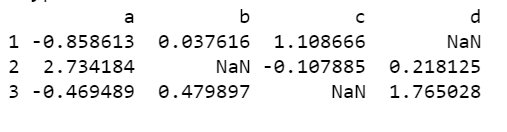

Note that the actual  numerical values  may be different from this because we are using random numbers to populate the object. 


In [142]:
data = pd.Series(np.random.randn(9), index=[ [1, 2, 3, 1, 3, 1, 2, 2, 3],['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd']])
data
data.unstack()

,a,b,c,d
1,1.728194,0.792993,-2.387261,NaN
2,0.853249,NaN,0.688000,3.197514
3,-0.193722,-0.303125,NaN,0.518566
